In [1]:
import cv2, os

In [2]:
data_path = "C:/Users/muska/OneDrive/Documents/COVID DETECTION/COVID_DATA"
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))
print(label_dict)
print(categories)
print(labels)

{'COVID NEGATIVE': 0, 'COVID POSITIVE': 1}
['COVID NEGATIVE', 'COVID POSITIVE']
[0, 1]


In [3]:
data = []
target = []
for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        try: 
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (120, 120))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print(e)        

In [4]:
import numpy as np
data = np.array(data)/255.0
data = np.reshape(data, (data.shape[0], 120, 120, 1))
target = np.array(target)

In [5]:
from keras.utils import np_utils 
new_target = np_utils.to_categorical(target)

In [6]:
np.save('data4', data)
np.save('target4', new_target)

In [7]:
data = np.load('data4.npy')
target = np.load('target4.npy')

In [8]:
import keras

In [9]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Activation, MaxPooling2D
from keras.utils.np_utils import normalize
from keras.layers import Concatenate 
from keras import Input
from keras.callbacks import ModelCheckpoint

In [10]:
input_shape = data.shape[1:]
inp = Input(shape = input_shape)
convs = []
parallel_kernels = [3,5,7]
for k in range(len(parallel_kernels)):
    conv = Conv2D(128, parallel_kernels[k], padding = 'same', activation = 'relu', input_shape = input_shape, strides = 1 )(inp)
    convs.append(conv)
out = Concatenate()(convs)
Conv_model = Model(inputs= inp, outputs = out)
model = Sequential()
model.add(Conv_model)
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, input_dim = 128, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 120, 120, 384)     11008     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 118, 118, 64)      221248    
_________________________________________________________________
activation (Activation)      (None, 118, 118, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 222784)            0         
_________________________________________________________________
dropout (Dropout)            (None, 222784)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [26]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.1)

In [12]:
from keras.callbacks import ModelCheckpoint

In [13]:
import tensorflow as tf



cp_callback = tf.keras.callbacks.ModelCheckpoint('model-{epoch:05d}.model',
                                                 monitor = 'val_loss',
                                                 verbose=0,
                                                 save_best_only=True,
                                                  mode = 'auto')
history = model.fit(train_data, train_target, epochs = 20, callbacks = [cp_callback], validation_split = 0.1)

Epoch 1/20
52/52 [==============================] - 343s 7s/step - loss: 0.4253 - accuracy: 0.8448 - val_loss: 0.1584 - val_accuracy: 0.9459
INFO:tensorflow:Assets written to: model-00001.model\assets
Epoch 2/20
52/52 [==============================] - 331s 6s/step - loss: 0.1905 - accuracy: 0.9374 - val_loss: 0.1689 - val_accuracy: 0.9622
Epoch 3/20
52/52 [==============================] - 333s 6s/step - loss: 0.1637 - accuracy: 0.9477 - val_loss: 0.0884 - val_accuracy: 0.9622
INFO:tensorflow:Assets written to: model-00003.model\assets
Epoch 4/20
52/52 [==============================] - 333s 6s/step - loss: 0.1098 - accuracy: 0.9609 - val_loss: 0.0763 - val_accuracy: 0.9784
INFO:tensorflow:Assets written to: model-00004.model\assets
Epoch 5/20
52/52 [==============================] - 335s 6s/step - loss: 0.0932 - accuracy: 0.9669 - val_loss: 0.0962 - val_accuracy: 0.9784
Epoch 6/20
52/52 [==============================] - 1395s 27s/step - loss: 0.0967 - accuracy: 0.9735 - val_loss: 0.

In [14]:
import matplotlib.pyplot as plt

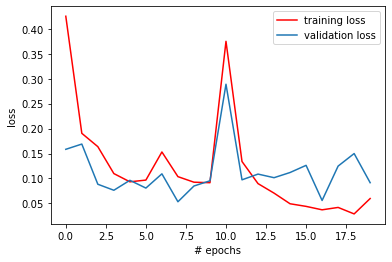

In [15]:
plt.plot(history.history['loss'], 'r', label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

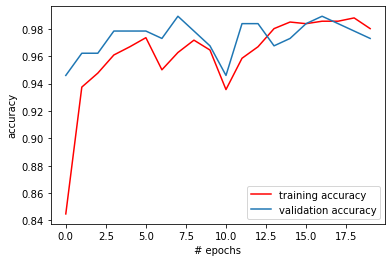

In [16]:
plt.plot(history.history['accuracy'], 'r', label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
model.evaluate(test_data, test_target)

7/7 [==============================] - 9s 1s/step - loss: 0.0636 - accuracy: 0.9806


[0.06357433646917343, 0.9805825352668762]

In [29]:
new_model = keras.models.load_model('model-00008.model')

In [30]:
new_model.evaluate(test_data, test_target)

7/7 [==============================] - 16s 2s/step - loss: 0.0295 - accuracy: 0.9951


[0.02947557158768177, 0.9951456189155579]

In [1]:
import pickle

In [2]:
import keras

In [5]:
new_model = keras.models.load_model('model-00008.model')

In [3]:
pickle.dump('model-00008.model', open('model_final.pkl', 'wb'))